In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = sns.load_dataset('titanic')
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
df = df[['age','fare','pclass','survived']]

In [ ]:
#Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

,0
age,0
fare,0
pclass,0
survived,0


In [ ]:
#Identify Outliers using z-score
z_scores = np.abs(stats.zscore(df[['age','fare']]))
outliers_z = df[(z_scores> 3).any(axis=1)]

In [ ]:
#Identify Outliers using IQR
Q1 = df[['age','fare']].quantile(0.25)
Q3 = df[['age','fare']].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers_iqr = df[((df[['age','fare']]< (Q1 - 1.2 * IQR)) | (df[['age','fare']]) > (Q3 + 1.2 *
IQR)).any(axis=1)]
print("Outliers detected using z-score: /n", outliers_z)

Outliers detected using z-score: /n       age      fare  pclass  survived
27   19.0  263.0000       1         0
88   23.0  263.0000       1         1
96   71.0   34.6542       1         0
116  70.5    7.7500       3         0
118  24.0  247.5208       1         0
258  35.0  512.3292       1         1
299  50.0  247.5208       1         1
311  18.0  262.3750       1         1
341  24.0  263.0000       1         1
377  27.0  211.5000       1         0
380  42.0  227.5250       1         1
438  64.0  263.0000       1         0
493  71.0   49.5042       1         0
527  28.0  221.7792       1         0
557  28.0  227.5250       1         0
630  80.0   30.0000       1         1
672  70.0   10.5000       2         0
679  36.0  512.3292       1         1
689  15.0  211.3375       1         1
700  18.0  227.5250       1         1
716  38.0  227.5250       1         1
730  29.0  211.3375       1         1
737  35.0  512.3292       1         1
742  21.0  262.3750       1         1
745  70.0   71

In [ ]:
print("Outliers Detected Using IQR :/n", outliers_iqr)


Outliers Detected Using IQR :/n Empty DataFrame
Columns: [age, fare, pclass, survived]
Index: []


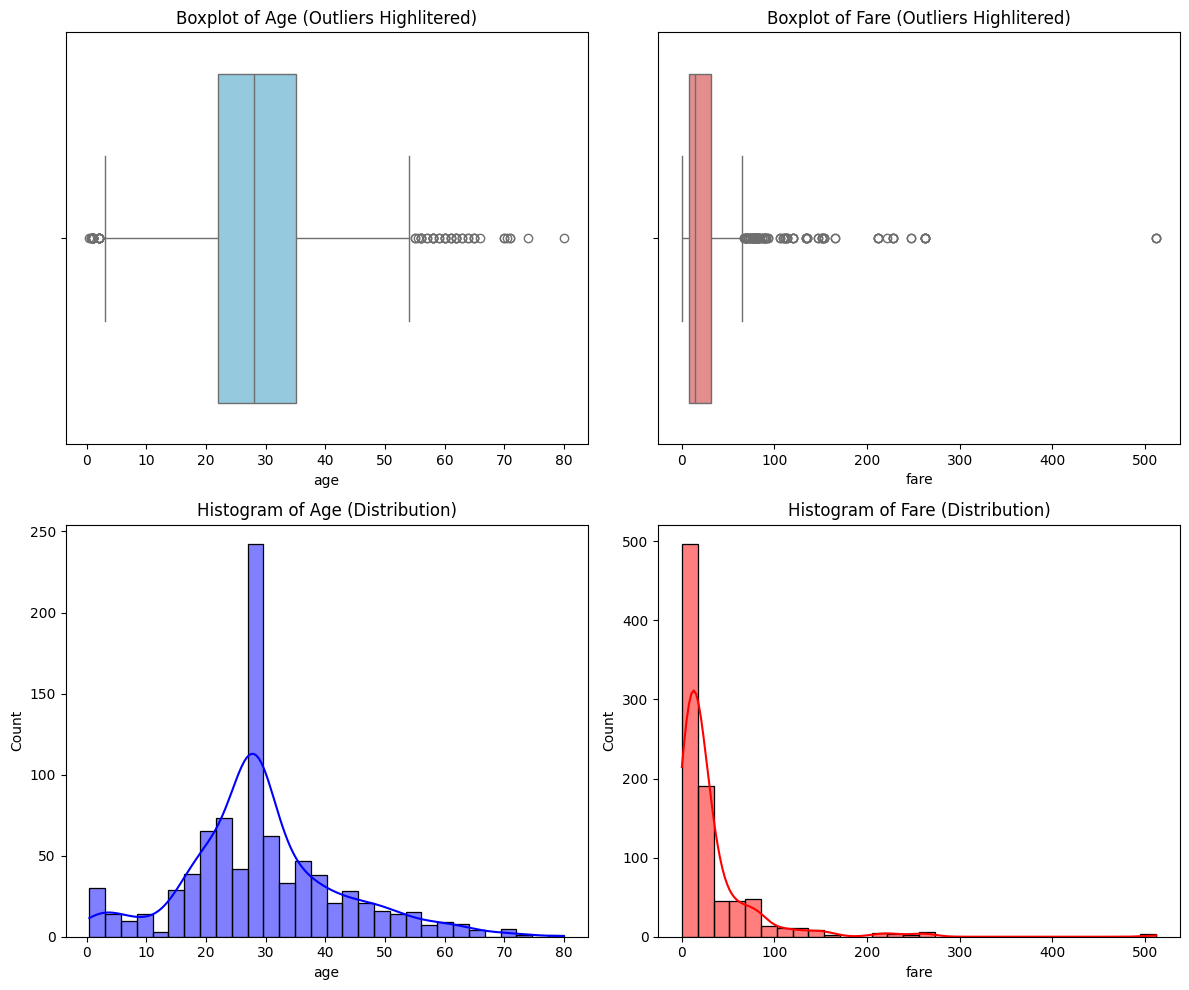

In [ ]:
#Visualization ( Boxplots & Histograms)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#Boxplot for Age
sns.boxplot(x=df['age'], ax=axes[0, 0], color ='skyblue')
axes [0,0].set_title('Boxplot of Age (Outliers Highlitered)')


#Boxplot for Fare
sns.boxplot(x=df['fare'], ax=axes[0, 1], color ='lightcoral')
axes [0,1].set_title('Boxplot of Fare (Outliers Highlitered)')

#Histogram for Age
sns.histplot(x=df['age'], bins = 30, kde = True, ax=axes[1, 0], color ='blue')
axes [1,0].set_title('Histogram of Age (Distribution)')

#Histogram for Fare
sns.histplot(x=df['fare'], bins = 30, kde = True, ax=axes[1, 1], color ='red')
axes [1,1].set_title('Histogram of Fare (Distribution)')

plt.tight_layout()
plt.show()

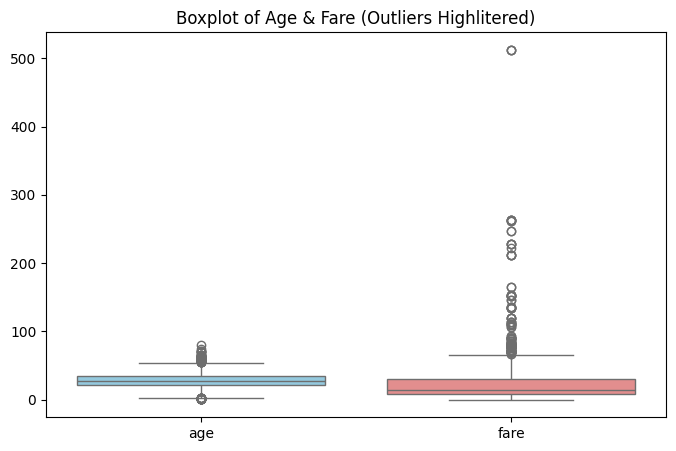

In [ ]:
#Combine Boxplot for Age & Fare
plt.figure(figsize = (8,5))
sns.boxplot(data = df [['age', 'fare']], palette=["skyblue", "lightcoral"])
plt.title("Boxplot of Age & Fare (Outliers Highlitered)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Sample Noisy Dataset (Simulated)
data = {
    'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age' : [25, 30, np.nan, 35, 40, 200, 45, 50, -10, 29],
    'Salary' : [50000, 60000, 55000, np.nan, 65000, 70000, 120000, 75000, 80000, 58000],
    'Department' : ['IT', 'HR', 'IT', 'Finance', 'HR', 'IT', 'Finance', 'HR', 'IT', 'HR']
}

df = pd.DataFrame(data)

#Step 1 : Handle Missing Data
df.fillna(df.median(numeric_only=True), inplace=True)

#Step 2 : Remove Duplicates
df.drop_duplicates(inplace=True)

#Step 3 : Identify and Remove Outliers using Z-Score
z_scores = np.abs(stats.zscore(df[['Age', 'Salary']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)] #Keep Values within 3 standard deviations

#Step 4 : Identify and Remove Outliers using IQR
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_no_outliers[~((df_no_outliers[['Age', 'Salary']] < (Q1 -1.5 * IQR)) |
                              (df_no_outliers[['Age', 'Salary']] > (Q3 -1.5 * IQR))).any(axis=1)]

print("Outliers Detected Using Z-Score:/n", df_no_outliers)
print("Outliers Detected Using IQR:/n", df_cleaned)

Outliers Detected Using Z-Score:/n    ID    Age    Salary Department
0   1   25.0   50000.0         IT
1   2   30.0   60000.0         HR
2   3   35.0   55000.0         IT
3   4   35.0   65000.0    Finance
4   5   40.0   65000.0         HR
5   6  200.0   70000.0         IT
6   7   45.0  120000.0    Finance
7   8   50.0   75000.0         HR
8   9  -10.0   80000.0         IT
9  10   29.0   58000.0         HR
Outliers Detected Using IQR:/n Empty DataFrame
Columns: [ID, Age, Salary, Department]
Index: []
